In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Generate clusters
n_features = 2
centers = 51
cluster_std = 400
sz = 20000

size = 100000
#Random: sizes = np.random.randint(1000, 100001, size=centers) | size[i]

In [4]:
# Generate clusters with adjusted range for cluster centers
cluster_centers_0 = np.random.uniform(-sz, sz, size=centers)
cluster_centers_1 = np.random.uniform(-sz, sz, size=centers)

X = np.empty((0, n_features))
y = np.empty(0)

for i in range(centers):
    cluster_points_0 = np.random.normal(loc=cluster_centers_0[i], scale=cluster_std, size=(size, 1))
    cluster_points_1 = np.random.normal(loc=cluster_centers_1[i], scale=cluster_std, size=(size, 1))
    cluster_points = np.hstack((cluster_points_0, cluster_points_1))
    
    X = np.vstack((X, cluster_points))
    y = np.hstack((y, np.full(size, i)))  

In [5]:
# Add noise points
n_noise = 5000
noise_points = np.random.uniform(low=(-sz - 2000), high=(sz + 2000), size=(n_noise, n_features))
X = np.vstack([X, noise_points])
y = np.hstack([y, np.full(n_noise, -1)])  # Assign label -1 to noise points

In [6]:
# Shuffle the data
indices = np.arange(len(X))
np.random.shuffle(indices)
    
X = X[indices]
y = y[indices]

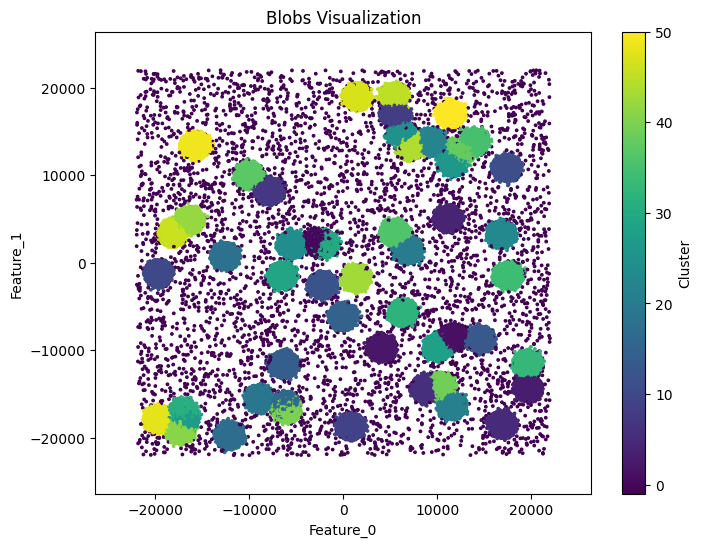

In [7]:
# Plot the data
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', s=3)
plt.title('Blobs Visualization')
plt.xlabel('Feature_0')
plt.ylabel('Feature_1')
plt.colorbar(label='Cluster')

# Adjusting plot limits to fit all points within the frame
x_min, x_max = np.min(X[:, 0]), np.max(X[:, 0])
y_min, y_max = np.min(X[:, 1]), np.max(X[:, 1])
x_margin = (x_max - x_min) * 0.1
y_margin = (y_max - y_min) * 0.1
plt.xlim(x_min - x_margin, x_max + x_margin)
plt.ylim(y_min - y_margin, y_max + y_margin)

plt.savefig('blobs_visualization.png')  # Save plot as an image
plt.show()

In [8]:
# Save points to a .csv file without the 'Label' column
df = pd.DataFrame(X)

print(df.describe())

print(df.head())

largest_x_value = df[0].max()
print("The largest x value in the CSV file is:", largest_x_value)

                  0             1
count  5.105000e+06  5.105000e+06
mean   1.281847e+03 -1.837544e+03
std    1.172629e+04  1.213059e+04
min   -2.199999e+04 -2.199820e+04
25%   -7.602251e+03 -1.419794e+04
50%    4.053851e+03 -1.356871e+03
75%    1.120200e+04  9.735825e+03
max    2.198669e+04  2.199806e+04
              0             1
0  17238.610518   2838.251312
1  17102.428877   3397.618508
2  -5169.844365   1456.857353
3  10311.690158 -14142.680643
4 -13246.894046    851.305629
The largest x value in the CSV file is: 21986.692756038923


In [9]:
df.to_csv('python_two.csv', index=False, header=False, encoding='utf-8')

In [10]:
# Load the CSV file into a DataFrame
df = pd.read_csv('python_data.csv', header=None, encoding='utf-8')

print(df.describe())

print(df.head())

largest_x_value = df[0].max()
print("The largest x value in the CSV file is:", largest_x_value)

                   0              1
count  252000.000000  252000.000000
mean     -743.087392     626.965653
std      6129.752895    6489.101494
min    -10424.877049   -9996.606316
25%     -5989.738013   -5367.872088
50%      -971.978819    2065.628603
75%      5725.520454    6272.582242
max     10088.801725    9986.868723
             0            1
0  1736.126122  2758.499944
1  6513.647278  -819.315819
2  6345.271548  8786.380262
3 -7964.044470  6231.996144
4  6453.644604  8614.717620
The largest x value in the CSV file is: 10088.801724980256


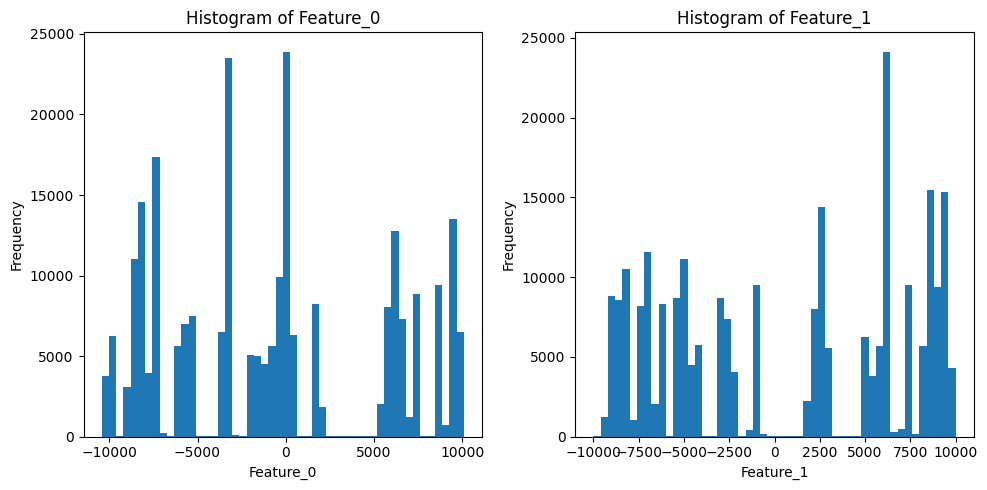

In [11]:
# Plot histograms of the features
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.hist(df[0], bins=50)
plt.title('Histogram of Feature_0')
plt.xlabel('Feature_0')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(df[1], bins=50)
plt.title('Histogram of Feature_1')
plt.xlabel('Feature_1')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()
